# Linear Regression
Linear regression is an algorithm that attempts to find the best line to fit some given data. For the sake of simplicity, we assume that the line passes through the origin, so we only need to determine the slope.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

## Gradient Descent
Gradient descent is the algorithm this implementation of linear regression uses to try and determine the slope (theta) of the line. For a given number of iterations, it tests a value of theta and determines how accurate or inaccurate that theta was. Based on that information, it updates the value of theta.
+ `X` is the matrix of inputs
+ `y` is the matrix of expected ouputs
+ `initial_theta` is the slope we start with and add/subtract to
+ `alpha` is the order of magnitude by which we increment theta
+ `interations` is how many times we should perform gradient descenet before stopping (otherwise it could run forever)

In [2]:
def gradient_descent(X: np.ndarray, y: np.ndarray,
                     inital_theta: float, alpha: float, iterations: int) -> float:
    theta = inital_theta

    m = len(y)
    for _ in range(iterations):
        arr = np.zeros((2, m))

        for i in range(m):
            # difference between calculated and actual
            arr[0, i] = (theta * X[i]) - y[i]
        
        total_err = sum(arr[0, :])
        
        # if the total error is 0 that means that we found a perfect fit to the data, 
        # so continuing to run the loop is just a waste of resources
        if total_err == 0:
            return theta
        
        theta -= alpha/m * total_err # alpha * average error

    return theta

## Putting it Together
This function takes in some training data and use the gradient descent function we defined above to determine the slope. Then it plots the prediction and the training data so that we can visually see how accurate the line is.

In [3]:
def linear_regression(train_X: np.ndarray, train_y: np.ndarray, X: np.ndarray,
                      inital_theta: float = 1, alpha: float = 0.01, iterations: int = 200) -> None:
    theta = gradient_descent(train_X, train_y, inital_theta, alpha, iterations)
    prediction = np.dot(X, theta)
    plt.plot(X, prediction)
    plt.scatter(train_X, train_y)
    plt.show()
    return theta

## Testing It
Here we define some training data and call the `linear_regression` function.

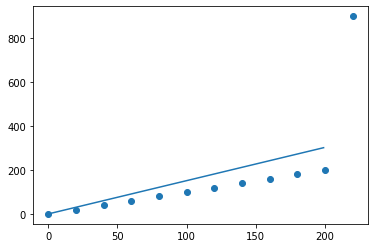

In [4]:
train_X = np.array([
    0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220
])
train_y = np.array([
    0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 900
])

theta = linear_regression(train_X, train_y, np.array(range(200)), iterations=1000)